In [0]:
hiby

###Titanic Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Practice Skills
Binary classification
Python and R basics

##Data Description
Overview
The data has been split into two groups:

####training set (train.csv) 

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

####test set (test.csv)

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

#### gender_submission.csv,

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


####Data Dictionary

Variable	Definition	Key
survival :	Survival	0 = No, 1 = Yes
pclass :	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	 : Sex	
Age	: Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket :	Ticket number	
fare	: Passenger fare	
cabin	: Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age:=Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp:= The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch = The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [103]:
#Importing Files to Colab
from google.colab import files
files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [0]:
import pandas as pd
df_gender = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [105]:
print("Columns")
print("Gender Data set ======================",df_gender.columns)
print(" Testing Data set Columns============= ", df_test.columns)
print(" Training Data Set columns============ ", df_train.columns)

Columns
Gender Data set ====================== Index(['PassengerId', 'Survived'], dtype='object')
 Testing Data set Columns=============  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
 Training Data Set columns============  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [106]:
print("Dataset shape")
print("Gender Data set ======================",df_gender.shape)
print(" Testing Data set Columns============= ", df_test.shape)
print(" Training Data Set columns============ ", df_train.shape)

Dataset shape
Gender Data set ====================== (418, 2)
 Testing Data set Columns=============  (418, 11)
 Training Data Set columns============  (891, 12)


In [107]:
print("Data Types of data frame ")
print("Gender Data set ===========")
print(df_gender.dtypes)
print(" Testing Data set Columns=== ")
print(df_test.dtypes)
print(" Training Data Set columns====== ")
print(df_train.dtypes)

Data Types of data frame 
Gender Data set ===========
PassengerId    int64
Survived       int64
dtype: object
 Testing Data set Columns=== 
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
 Training Data Set columns====== 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [108]:
print("Stats of data frame ")
print("==================Gender Data set ===========")
print(df_gender.describe())
print(" =================Testing Data set stats======= ")
print(df_test.describe())
print(" =================Training Data Set stats====== ")
print(df_train.describe())

Stats of data frame 
==================Gender Data set ===========
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000
 =================Testing Data set stats======= 
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.0000

In [109]:
print("Head of data frame ")
print("==================Gender Data set ===========")
print(df_gender.head(2))
print(" =================Testing Data set stats======= ")
print(df_test.head(2))
print(" =================Training Data Set stats====== ")
print(df_train.head(2))

Head of data frame 
==================Gender Data set ===========
   PassengerId  Survived
0          892         0
1          893         1
 =================Testing Data set stats======= 
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
 =================Training Data Set stats====== 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0   

In [110]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict = dict()
datadict['MissingVal_train'] = df_train.isnull().sum()
datadict['MissingVal_test']= df_test.isnull().sum()
datadict['MissingVal_gender'] = df_gender.isnull().sum()
datadict

{'MissingVal_gender': PassengerId    0
 Survived       0
 dtype: int64, 'MissingVal_test': PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64, 'MissingVal_train': PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64}

In [111]:
print("Training Data : Maximum occuring Age count :",df_train['Age'].mode())
print("Training Data : Maximum occuring Cabin count :",df_train['Cabin'].mode())

print("Testing Data : Maximum occuring Age count :",df_test['Age'].mode())
print("Testing Data : Maximum occuring Cabin count :",df_test['Cabin'].mode())



Training Data : Maximum occuring Age count : 0    24.0
dtype: float64
Training Data : Maximum occuring Cabin count : 0        B96 B98
1    C23 C25 C27
2             G6
dtype: object
Testing Data : Maximum occuring Age count : 0    21.0
1    24.0
dtype: float64
Testing Data : Maximum occuring Cabin count : 0    B57 B59 B63 B66
dtype: object


In [0]:
#filling the NaN values with mean of the columns 
df_gender.fillna(df_gender.mean(), inplace = True)

df_test.fillna(df_test.mean(), inplace = True )

df_train.fillna(df_train.mean(), inplace= True)

In [113]:
# identify missing values AGAIN of the three data set ,add the stats to the datadict
datadict = dict()
datadict['MissingVal_train'] = df_train.isnull().sum()
datadict['MissingVal_test']= df_test.isnull().sum()
datadict['MissingVal_gender'] = df_gender.isnull().sum()
datadict

{'MissingVal_gender': PassengerId    0
 Survived       0
 dtype: int64, 'MissingVal_test': PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64, 'MissingVal_train': PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64}

In [114]:
print("Head of data frame ")
print("==================Gender Data set ===========")
print(df_gender.head(10))
print(" =================Testing Data set stats======= ")
print(df_test.head(10))
print(" =================Training Data Set stats====== ")
print(df_train.head(10))

Head of data frame 
==================Gender Data set ===========
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0
 =================Testing Data set stats======= 
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Co

In [115]:
df_train.fillna(0, inplace= True)
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C


In [116]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique_train']=df_train.nunique()
datadict['NUnique_test']=df_test.nunique()
datadict['NUnique_gender']=df_gender.nunique()
datadict

{'MissingVal_gender': PassengerId    0
 Survived       0
 dtype: int64, 'MissingVal_test': PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64, 'MissingVal_train': PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, 'NUnique_gender': PassengerId    418
 Survived         2
 dtype: int64, 'NUnique_test': PassengerId    418
 Pclass           3
 Name           418
 Sex              2
 Age             80
 SibSp            7
 Parch            8
 Ticket         363
 Fare           170
 Cabin           76
 Embarked         3
 dtype: int64, 'NUnique_train': PassengerId    891
 Survived         2
 Pclass           3
 Na

In [117]:
# get discripte statistcs on "object" datatypes
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,4
top,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",male,1601,0,S
freq,1,577,7,687,644


In [118]:
# get discripte statistcs on "object" datatypes
df_test.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Wheeler, Mr. Edwin Frederick""""",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [119]:
# get discriptive statistcs on "number" datatypes
df_train.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
# get discriptive statistcs on "number" datatypes
df_test.describe(include=['number'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [121]:
df_train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


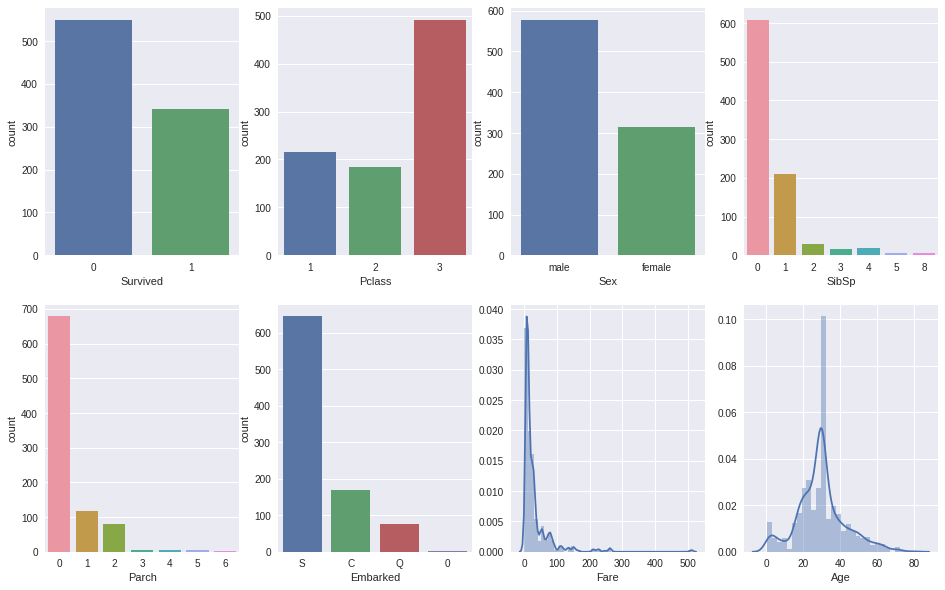

In [122]:
##Univariate Analysis for Training Set 
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=df_train,ax=axes[0,0])
sns.countplot('Pclass',data=df_train,ax=axes[0,1])
sns.countplot('Sex',data=df_train,ax=axes[0,2])
sns.countplot('SibSp',data=df_train,ax=axes[0,3])
sns.countplot('Parch',data=df_train,ax=axes[1,0])
sns.countplot('Embarked',data=df_train,ax=axes[1,1])
sns.distplot(df_train['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df_train['Age'].dropna(),kde=True,ax=axes[1,3])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


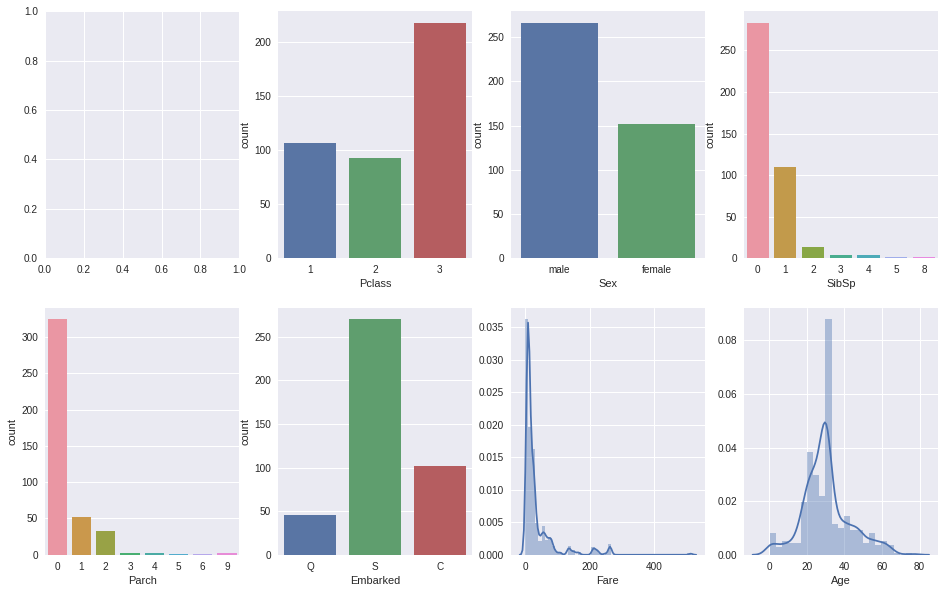

In [123]:
##Univariate Analysis for Testing Set 
fig, axes = plt.subplots(2,4, figsize=(16, 10))
#sns.countplot('Survived',data=df_test,ax=axes[0,0])
sns.countplot('Pclass',data=df_test,ax=axes[0,1])
sns.countplot('Sex',data=df_test,ax=axes[0,2])
sns.countplot('SibSp',data=df_test,ax=axes[0,3])
sns.countplot('Parch',data=df_test,ax=axes[1,0])
sns.countplot('Embarked',data=df_test,ax=axes[1,1])
sns.distplot(df_test['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df_test['Age'].dropna(),kde=True,ax=axes[1,3])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


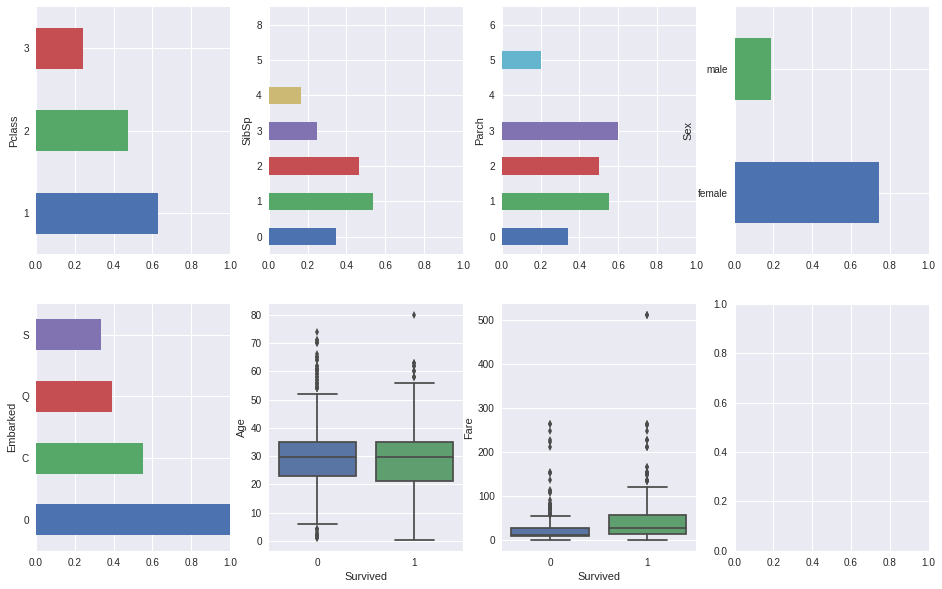

In [124]:
#Bivariate EDA

figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
df_train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
df_train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
df_train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
df_train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
df_train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=df_train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=df_train,ax=axesbi[1,2])



 Train Data set 


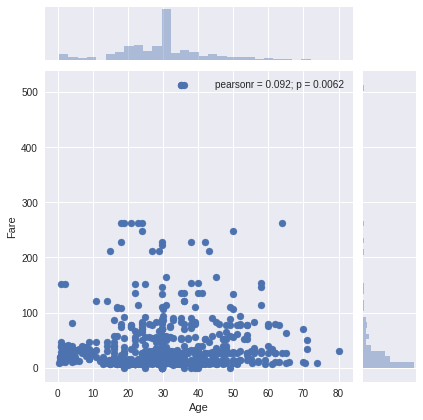

In [125]:
#Joint Scatter Plots(continous vs continous)
print(" Train Data set ")
sns.jointplot(x="Age", y="Fare", data=df_train, label ='Train Data Set' );




 Test Data set 


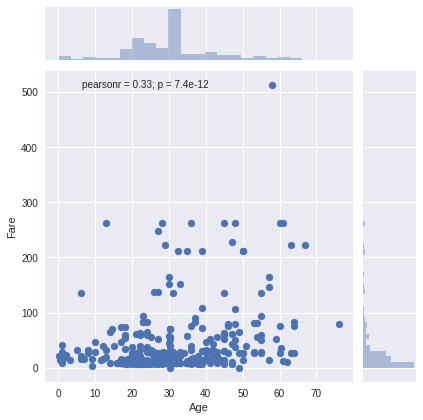

In [126]:
print(" Test Data set ")
sns.jointplot(x="Age", y="Fare", data=df_test);

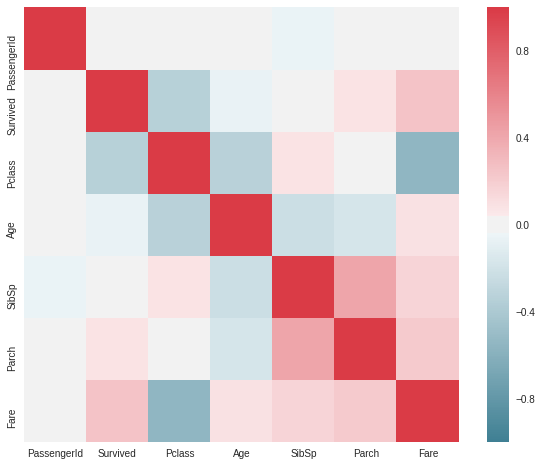

In [127]:
#Multivariate Analysis 
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [128]:
# Identify and remove duplicate entries
titanic_data_duplicates = df_train.duplicated()
print ('Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum()))

Number of duplicate entries is/are 0


In [129]:
# Age min  given  a closer look for babies 
df_train[df_train['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,0,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,0,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,0,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,0,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,0,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,0,S


In [130]:
# Age min  given  a closer look for babies 
df_test[df_test['Age'] < 1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.400,NaN,S
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.750,NaN,S
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,NaN,S
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


In [131]:
# Taking a look at some survival rates for babies
youngest_to_survive = df_train[df_train['Survived'] == True]['Age'].min()
youngest_to_die = df_train[df_train['Survived'] == False]['Age'].min()
oldest_to_survive = df_train[df_train['Survived'] == True]['Age'].max()
oldest_to_die = df_train[df_train['Survived'] == False]['Age'].max()

print ('Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die))

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


In [132]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [133]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
df_test = df_test.merge(df_gender, left_on='PassengerId', right_on='PassengerId', how='outer')

In [136]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [137]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [0]:
#one hot encoding Training 
df_train = pd.get_dummies(df_train ,columns=['Embarked','Sex' ] )

In [139]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,0,0,1,0,1


In [0]:
df_train = df_train[['PassengerId','Pclass',	'Name',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin',	'Embarked_0',	'Embarked_C',	'Embarked_Q',	'Embarked_S',	'Sex_female',	'Sex_male','Survived']]

In [141]:
df_train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,0,0,1,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,1
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,1,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,0,0,1,0,1,0


In [0]:
df_train = df_train.drop(['Name','Ticket','Embarked_0', 'Cabin'], axis=1 )

In [0]:
#one hot encoding and rearrangement of columns of test set 

df_test = pd.get_dummies(df_test ,columns=['Embarked','Sex'] )


In [144]:
df_test.head()
df_test.isnull().sum()
df_test.fillna(0)


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,0,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,0,1,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,0,0,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,0,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,0,1,0,0,1,1,0
5,897,3,"Svensson, Mr. Johan Cervin",14.00000,0,0,7538,9.2250,0,0,0,0,1,0,1
6,898,3,"Connolly, Miss. Kate",30.00000,0,0,330972,7.6292,0,1,0,1,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",26.00000,1,1,248738,29.0000,0,0,0,0,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.00000,0,0,2657,7.2292,0,1,1,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",21.00000,2,0,A/4 48871,24.1500,0,0,0,0,1,0,1


In [145]:
df_test = df_test.drop(['Name','Ticket', 'Cabin'], axis=1 )
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,1,0,0,1,1,0
2,894,2,62.0,0,0,9.6875,0,0,1,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,0,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1,1,0


In [0]:
df_test = df_test[['PassengerId','Pclass',		'Age',	'SibSp',	'Parch',	'Fare',			'Embarked_C',	'Embarked_Q',	'Embarked_S',	'Sex_female',	'Sex_male','Survived']]

In [0]:
df_test.fillna(0, inplace = True )

**Test Data set **

In [148]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,1


In [0]:
#splitting into training and testing set 
df_test_features = df_test[['PassengerId','Pclass',		'Age',	'SibSp',	'Parch',	'Fare',			'Embarked_C',	'Embarked_Q',	'Embarked_S',	'Sex_female',	'Sex_male']]
df_test_label  = df_test[['Survived']]

df_train_features = df_train[['PassengerId','Pclass',		'Age',	'SibSp',	'Parch',	'Fare',			'Embarked_C',	'Embarked_Q',	'Embarked_S',	'Sex_female',	'Sex_male']]
df_train_label  = df_train[['Survived']]


**Train Data set **

In [150]:
df_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived
0,1,3,22.0,1,0,7.2500,0,0,1,0,1,0
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1
2,3,3,26.0,0,0,7.9250,0,0,1,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,1
4,5,3,35.0,0,0,8.0500,0,0,1,0,1,0


**Model Training **

***          1. Logistic Regression***

In [151]:
from sklearn import linear_model 
from sklearn.metrics import classification_report
logmodel = linear_model.LogisticRegression(C=1e5)
logmodel.fit(df_train_features ,df_train_label  )
predictval = logmodel.predict(df_test_features)
print(classification_report(df_test_label ,predictval))

             precision    recall  f1-score   support

          0       0.97      0.94      0.96       266
          1       0.91      0.95      0.93       152

avg / total       0.95      0.94      0.95       418



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*            **2. Decision Tree* **

In [152]:
from sklearn import tree
logmodel= tree.DecisionTreeClassifier()
logmodel.fit(df_train_features ,df_train_label  )
predictval = logmodel.predict(df_test_features)
print(classification_report(df_test_label ,predictval))


             precision    recall  f1-score   support

          0       0.78      0.87      0.82       266
          1       0.72      0.58      0.64       152

avg / total       0.76      0.76      0.76       418



*             **3. Support vector machine**

In [153]:
from sklearn import svm
logmodel=  svm.SVC()
logmodel.fit(df_train_features ,df_train_label  )
predictval = logmodel.predict(df_test_features)
print(classification_report(df_test_label ,predictval))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78       266
          1       0.00      0.00      0.00       152

avg / total       0.40      0.64      0.49       418



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


*                **4.  Random Forest **

In [154]:
from sklearn.ensemble import RandomForestClassifier
logmodel=  RandomForestClassifier(max_depth=2, random_state=0)
logmodel.fit(df_train_features ,df_train_label  )
predictval = logmodel.predict(df_test_features)
print(classification_report(df_test_label ,predictval))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       266
          1       1.00      0.99      0.99       152

avg / total       1.00      1.00      1.00       418



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


*                **5 .  Neural Network  **

In [155]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from keras import metrics
from keras.layers import Dropout
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

# Initialising the NN
model = Sequential()
# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae','accuracy'])

# Train the ANN
model.fit(df_train_features, df_train_label, batch_size = 32, epochs = 200)

predictval = model.predict(df_test_features)

#Evaluate model on test data
score = model.evaluate(df_test_features, df_test_label, verbose=0)
print("loss {} ,             mean sq error {},  accuracy {}")
print(score)


Epoch 1/200
891/891 [==============================] - 3s 4ms/step - loss: 0.6928 - mean_absolute_error: 0.4997 - acc: 0.5645
Epoch 2/200
891/891 [==============================] - 0s 86us/step - loss: 0.6912 - mean_absolute_error: 0.4989 - acc: 0.5903
Epoch 3/200
891/891 [==============================] - 0s 86us/step - loss: 0.6872 - mean_absolute_error: 0.4968 - acc: 0.6072
Epoch 4/200
891/891 [==============================] - 0s 90us/step - loss: 0.6825 - mean_absolute_error: 0.4942 - acc: 0.6308
Epoch 5/200
891/891 [==============================] - 0s 88us/step - loss: 0.6805 - mean_absolute_error: 0.4926 - acc: 0.6184
Epoch 6/200
891/891 [==============================] - 0s 89us/step - loss: 0.6750 - mean_absolute_error: 0.4892 - acc: 0.6251
Epoch 7/200
891/891 [==============================] - 0s 89us/step - loss: 0.6783 - mean_absolute_error: 0.4897 - acc: 0.6150
Epoch 8/200
891/891 [==============================] - 0s 87us/step - loss: 0.6668 - mean_absolute_error: 0.4836

In [156]:
predictval = model.predict(df_test_features)

#print(classification_report(df_test_label ,predictval))

#y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])


model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.mae, metrics.categorical_accuracy])


print(keras.metrics.categorical_accuracy(df_test_label, predictval))
print(keras.metrics.top_k_categorical_accuracy(df_test_label, predictval, k=5))
print(keras.metrics.sparse_top_k_categorical_accuracy(df_test_label, predictval, k=5))

Tensor("Cast_30:0", shape=(418,), dtype=float32)
Tensor("Mean_8:0", shape=(), dtype=float32)
Tensor("Mean_9:0", shape=(), dtype=float32)


In [157]:
#Multi Layer perceptron from SKlearn
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(df_train_features, df_train_label)  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


predictval = clf.predict(df_test_features)


print(classification_report(df_test_label ,predictval))


             precision    recall  f1-score   support

          0       0.87      0.99      0.93       266
          1       0.98      0.75      0.85       152

avg / total       0.91      0.90      0.90       418



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
